# Импорт библиотек

In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing
from sklearn.datasets import load_boston


# Практическое задание

В sklearn есть встроенные  наборы данных. Возьмём для примера один из них — load_boston(), в нём содержится информация о ценах на недвижимость в Бостоне.

Посмотрим его описание

In [3]:
boston_data = load_boston()
print(boston_data['DESCR']);

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

Загрузим данные о признаках в "x", а целевые значения — в "y"

In [4]:
df_boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

df_boston['price'] = boston_data.target; # задали y

Посмотрим основную информацию о нём

In [5]:
df_boston.columns = map(str.capitalize, df_boston.columns)
df_boston.head()

,Crim,Zn,Indus,Chas,Nox,Rm,Age,Dis,Rad,Tax,Ptratio,B,Lstat,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Переменуем ждля наглядности столбцы
df_boston.rename(columns = {'Crim' : 'Per_capita_crime_rate', 
                            'Zn' : 'Zoned_for_lots ', 'Indus':'Industrial',
                            'Chas': 'Charles_River_variable',
                           'Nox': 'NO_concentration',
                           'Rm':'Aver_rooms_per_dwelling',
                           'Dis':'Weighted_distances_to_centres',
                           'Rad':'Index_radial_highways',
                           'Tax':'Tax_rate',
                            'Ptratio':'Pupil-teacher_ratio',
                            'B':'proportion_of_black_people',
                            'Lstat':'lower_status_population'}, inplace = True) 

In [7]:
df_boston

,Per_capita_crime_rate,Zoned_for_lots,Industrial,Charles_River_variable,NO_concentration,Aver_rooms_per_dwelling,Age,Weighted_distances_to_centres,Index_radial_highways,Tax_rate,Pupil-teacher_ratio,proportion_of_black_people,lower_status_population,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
df_boston.isna().sum()

Per_capita_crime_rate            0
Zoned_for_lots                   0
Industrial                       0
Charles_River_variable           0
NO_concentration                 0
Aver_rooms_per_dwelling          0
Age                              0
Weighted_distances_to_centres    0
Index_radial_highways            0
Tax_rate                         0
Pupil-teacher_ratio              0
proportion_of_black_people       0
lower_status_population          0
Price                            0
dtype: int64

In [9]:
# проверка на дубли
print(f'Количество дублей {df_boston[df_boston.duplicated()].shape[0]} в нашем сете из {df_boston.shape[0]}')
df_boston.drop_duplicates(keep='first',inplace=True) # оставяем первый вариант
print(f'После удаления количество записей в наборе данных - {df_boston.shape[0]}')

Количество дублей 0 в нашем сете из 506
После удаления количество записей в наборе данных - 506


In [10]:
corr_df = df_boston.corr()
corr_df

,Per_capita_crime_rate,Zoned_for_lots,Industrial,Charles_River_variable,NO_concentration,Aver_rooms_per_dwelling,Age,Weighted_distances_to_centres,Index_radial_highways,Tax_rate,Pupil-teacher_ratio,proportion_of_black_people,lower_status_population,Price
Per_capita_crime_rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
Zoned_for_lots,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
Industrial,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
Charles_River_variable,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NO_concentration,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
Aver_rooms_per_dwelling,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
Age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
Weighted_distances_to_centres,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
Index_radial_highways,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
Tax_rate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


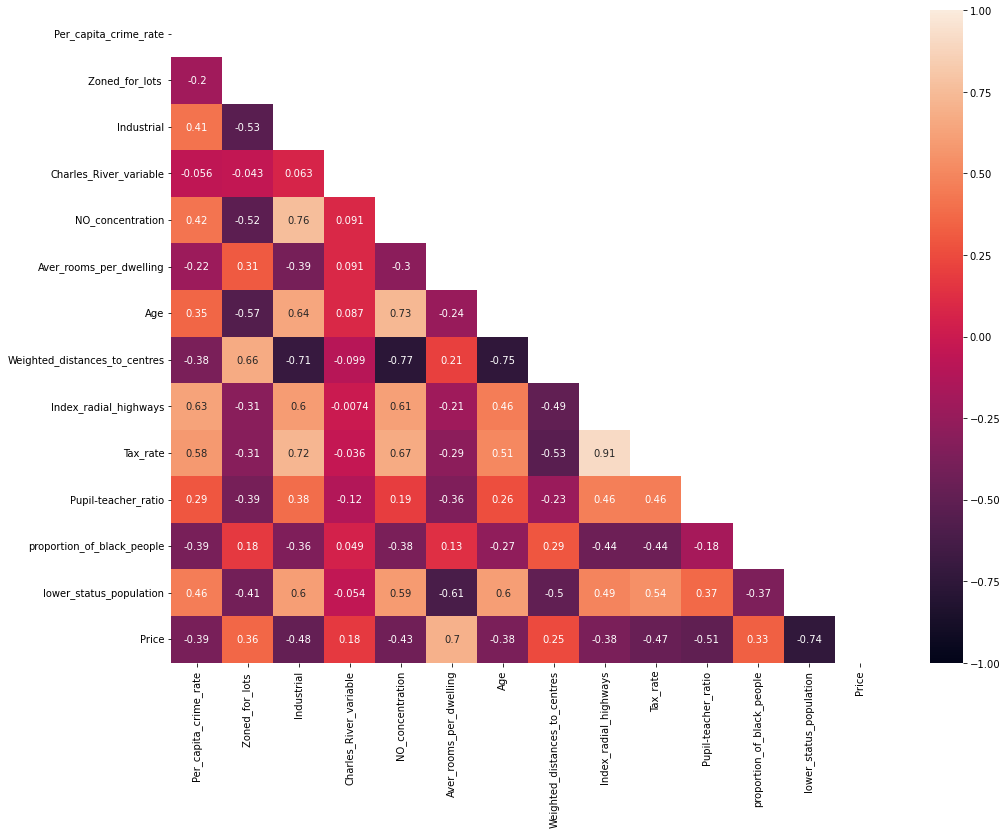

In [11]:
plt.figure(figsize=(16, 12))
mask = np.triu(df_boston.corr())
sns.heatmap(corr_df, center=0, annot=True, mask = mask, vmax=1, vmin=-1, cmap='rocket');


Коэффициент корреляции 0.695359947071539


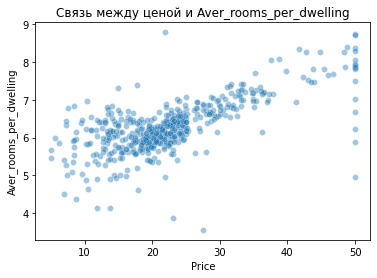

Коэффициент корреляции 0.5077866855375615


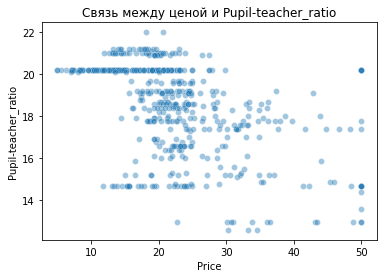

Коэффициент корреляции 0.7376627261740148


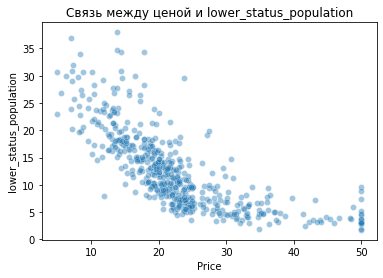

In [12]:
# Заметная значимость по шкале Чеддока - при коэффициенте корреляции |0.5| и выше
ched = 0.5
for i in df_boston.columns[:-1]:
    c_corr = df_boston[i].corr(df_boston.Price)
    if abs(c_corr) >= ched:
        sns.scatterplot(x="Price", y=i, data=df_boston, alpha=0.42)
        print("Коэффициент корреляции " + str(abs(c_corr)))
        plt.title("Связь между ценой и " + str(i))
        plt.show()


In [13]:
for el in list(df_boston.columns):
    print(el, end=', ');

Per_capita_crime_rate, Zoned_for_lots , Industrial, Charles_River_variable, NO_concentration, Aver_rooms_per_dwelling, Age, Weighted_distances_to_centres, Index_radial_highways, Tax_rate, Pupil-teacher_ratio, proportion_of_black_people, lower_status_population, Price, 

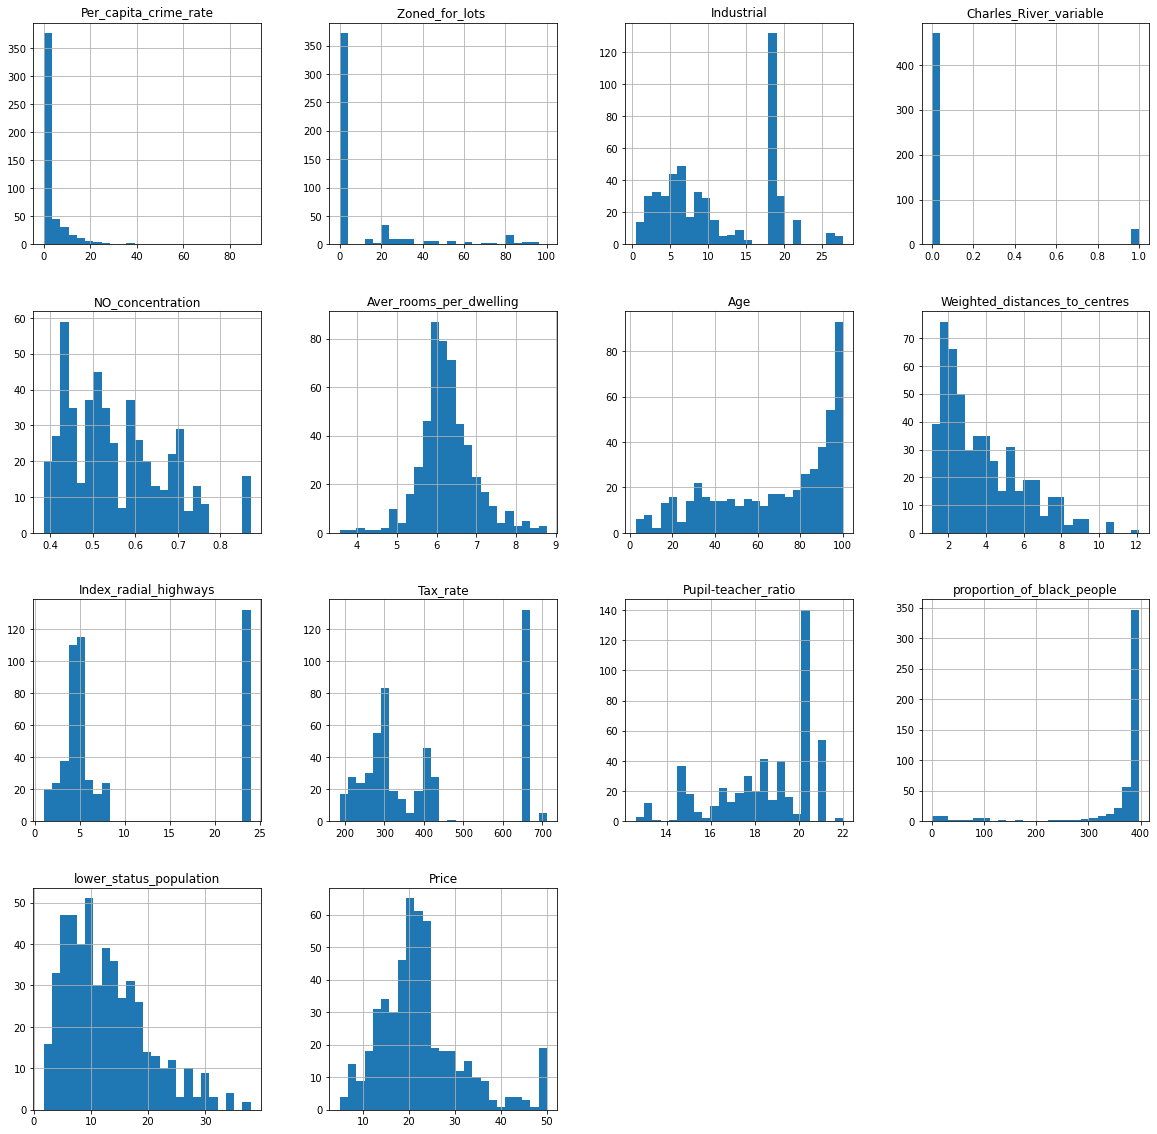

In [25]:

df_boston.hist(bins=25, figsize=(20, 20));


## Обучение модели

In [66]:
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target


In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_)
print(lr.coef_)

30.246750993923946
[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


In [69]:
["{:10} {:.2f}".format(x, y) for y, x in sorted(zip(lr.coef_, boston_data.feature_names))]

['NOX        -17.20',
 'DIS        -1.45',
 'PTRATIO    -0.92',
 'LSTAT      -0.51',
 'CRIM       -0.11',
 'TAX        -0.01',
 'AGE        -0.01',
 'B          0.01',
 'ZN         0.03',
 'INDUS      0.04',
 'RAD        0.26',
 'CHAS       2.78',
 'RM         4.44']

In [70]:
pred_test = lr.predict(X_test)
pred_train = lr.predict(X_train)

In [71]:
def plot_learning_curves(model, x, y): #график скорости обучения
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")

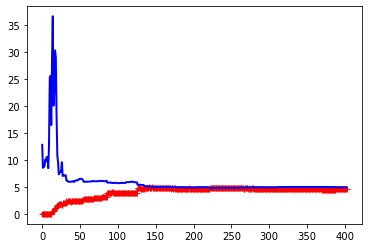

In [72]:
plot_learning_curves (lr, X, y)

In [74]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression(fit_intercept=False)),])

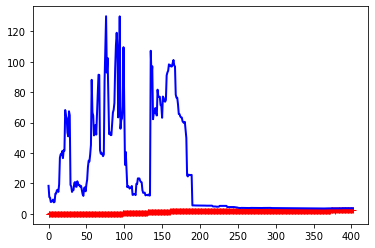

In [75]:
plot_learning_curves(polynomial_regression, X, y)

In [76]:
new_model = polynomial_regression.fit(X_train, y_train)
new_pred_train = new_model.predict(X_train)
new_pred_test = new_model.predict(X_test)

## Оценка точности модели на обучающей выборке и тестовой

In [82]:
print(f'Линейная модель\n')
print(f"MAE на обучающей выборке {mean_absolute_error(y_train, pred_train)}")
print(f"MAE на тестовой выборке {mean_absolute_error(y_test, pred_test)}")
print(f"\nMSE на обучающей выборке {mean_squared_error(y_train, pred_train)}")
print(f"MSE на тестовой выборке {mean_squared_error(y_test, pred_test)}")
print(f"\nRMSE на обучающей выборке {math.sqrt(mean_squared_error(y_train, pred_train))}")
print(f"RMSE на тестовой выборке {math.sqrt(mean_squared_error(y_test, pred_test))}")
print(f"\nR2 на обучающей выборке {r2_score(y_train, pred_train)}")
print(f"R2 на тестовой выборке {r2_score(y_test, pred_test)}")


Линейная модель

MAE на обучающей выборке 3.3147716267832226
MAE на тестовой выборке 3.1890919658878287

MSE на обучающей выборке 21.641412753226312
MSE на тестовой выборке 24.291119474973456

RMSE на обучающей выборке 4.6520331848801675
RMSE на тестовой выборке 4.928602182665331

R2 на обучающей выборке 0.7508856358979673
R2 на тестовой выборке 0.6687594935356329


In [79]:
print(f'Полинормальная модель со степенью 2\n')
print(f'MAE на обучающей выборке {mean_absolute_error(y_train, new_pred_train)}')
print(f'MAE на тестовой выборке {mean_absolute_error(y_test, new_pred_test)}')
print(f'\nMSE на обучающей выборке {mean_squared_error(y_train, new_pred_train)}')
print(f'MSE на тестовой выборке {mean_squared_error(y_test, new_pred_test)}')
print(f'\nRMSE на обучающей выборке {math.sqrt(mean_squared_error(y_train, new_pred_train))}')
print(f'RMSE на тестовой выборке {math.sqrt(mean_squared_error(y_test, new_pred_test))}')
print(f'\nR2 на обучающей выборке {r2_score(y_train, new_pred_train)}')
print(f'R2 на тестовой выборке {r2_score(y_test, new_pred_test)}')

Полинормальная модель со степенью 2

MAE на обучающей выборке 1.75117512856257
MAE на тестовой выборке 2.5561194658092816

MSE на обучающей выборке 5.227366354365663
MSE на тестовой выборке 13.947309094542538

RMSE на обучающей выборке 2.2863434462839707
RMSE на тестовой выборке 3.7346096308104997

R2 на обучающей выборке 0.939827770943372
R2 на тестовой выборке 0.8098105880607467
